# Anomaly Frequency

This notebook shows how use the class AnomaliesFrequencies in context/common. It is computing to frequency of anomalies in a time window. 

In [1]:
# Import to be able to import python package from src
import sys
sys.path.insert(0, '../../src')
import pandas as pd
import matplotlib.pyplot as plt
import ontime as on

In [2]:
ts = on.generators.random_walk().generate(start=pd.Timestamp('2022-01-01'), end=pd.Timestamp('2022-12-31'))

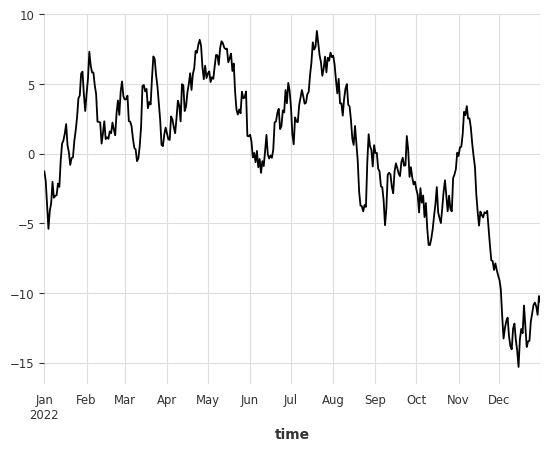

In [3]:
# darts time series to pandas series
pd_series = ts.pd_series()
plot = pd_series.plot()
plt.show()

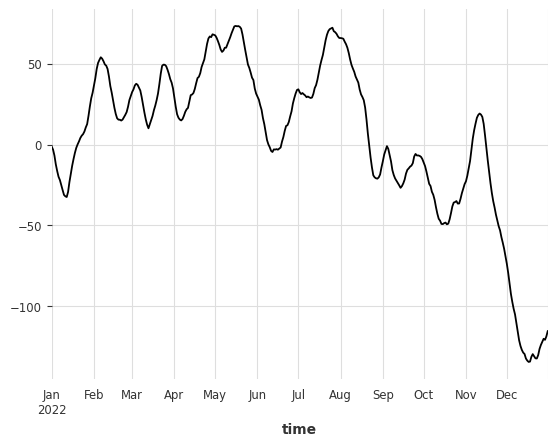

In [4]:
sum = pd_series.rolling(window='10D').sum()
sum.plot()
plt.show()

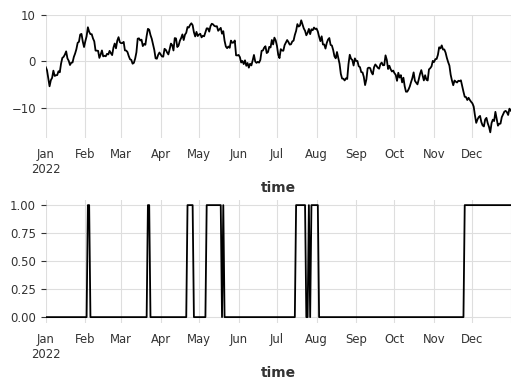

In [6]:
det = on.detectors.quantile(low_quantile=0.1, high_quantile=0.9)
det.fit(ts)
ts_detect = det.detect(ts)

fig, ax = plt.subplots(2, figsize=(6, 4))
ts.pd_series().plot(ax=ax[0], label='ts')
ts_detect.pd_series().plot(ax=ax[1], label='anomalies')
fig.subplots_adjust(hspace=.5)
plt.show()

In [7]:
anomalies_frequencies = on.context.common.AnomalyFrequency(ts_detect)

In [8]:
ts_sum = anomalies_frequencies.get_frequency_of_anomaly_in_window(window_size='20D')

ts_sum.plot()

alt.LayerChart(...)

In [9]:
ts_sum = anomalies_frequencies.get_number_of_anomaly_in_window(window_size='20D')

ts_sum.plot()

alt.LayerChart(...)